# Principal Component Analysis with Cancer Data

In [42]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import zscore


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
df_cancer = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [3]:
df_cancer.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [5]:
df_cancer.drop("ID",axis=1, inplace=True)

In [6]:
df_cancer.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [8]:
df_cancer.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
df_cancer.shape

(699, 10)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [10]:
df_cancer.isna().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
df_cancer.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [13]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [14]:
df_cancer.loc[df_cancer["Bare Nuclei"]=="?"].count()

ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [15]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [16]:
df_cancer.replace('?', np.NaN, inplace=True)

In [17]:
df_cancer["Bare Nuclei"] = df_cancer["Bare Nuclei"].astype('float64')

In [18]:
df_cancer.dtypes

ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [19]:
df_cancer["Bare Nuclei"].value_counts()

1.0     402
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare Nuclei, dtype: int64

In [20]:
df_cancer.isna().sum()

ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [21]:
#Replacing NaN with mode
df_cancer["Bare Nuclei"].fillna(df_cancer["Bare Nuclei"].mode()[0], inplace=True)

In [22]:
df_cancer["Bare Nuclei"].value_counts()

1.0     418
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare Nuclei, dtype: int64

In [23]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [24]:
# Check for correlation of variable

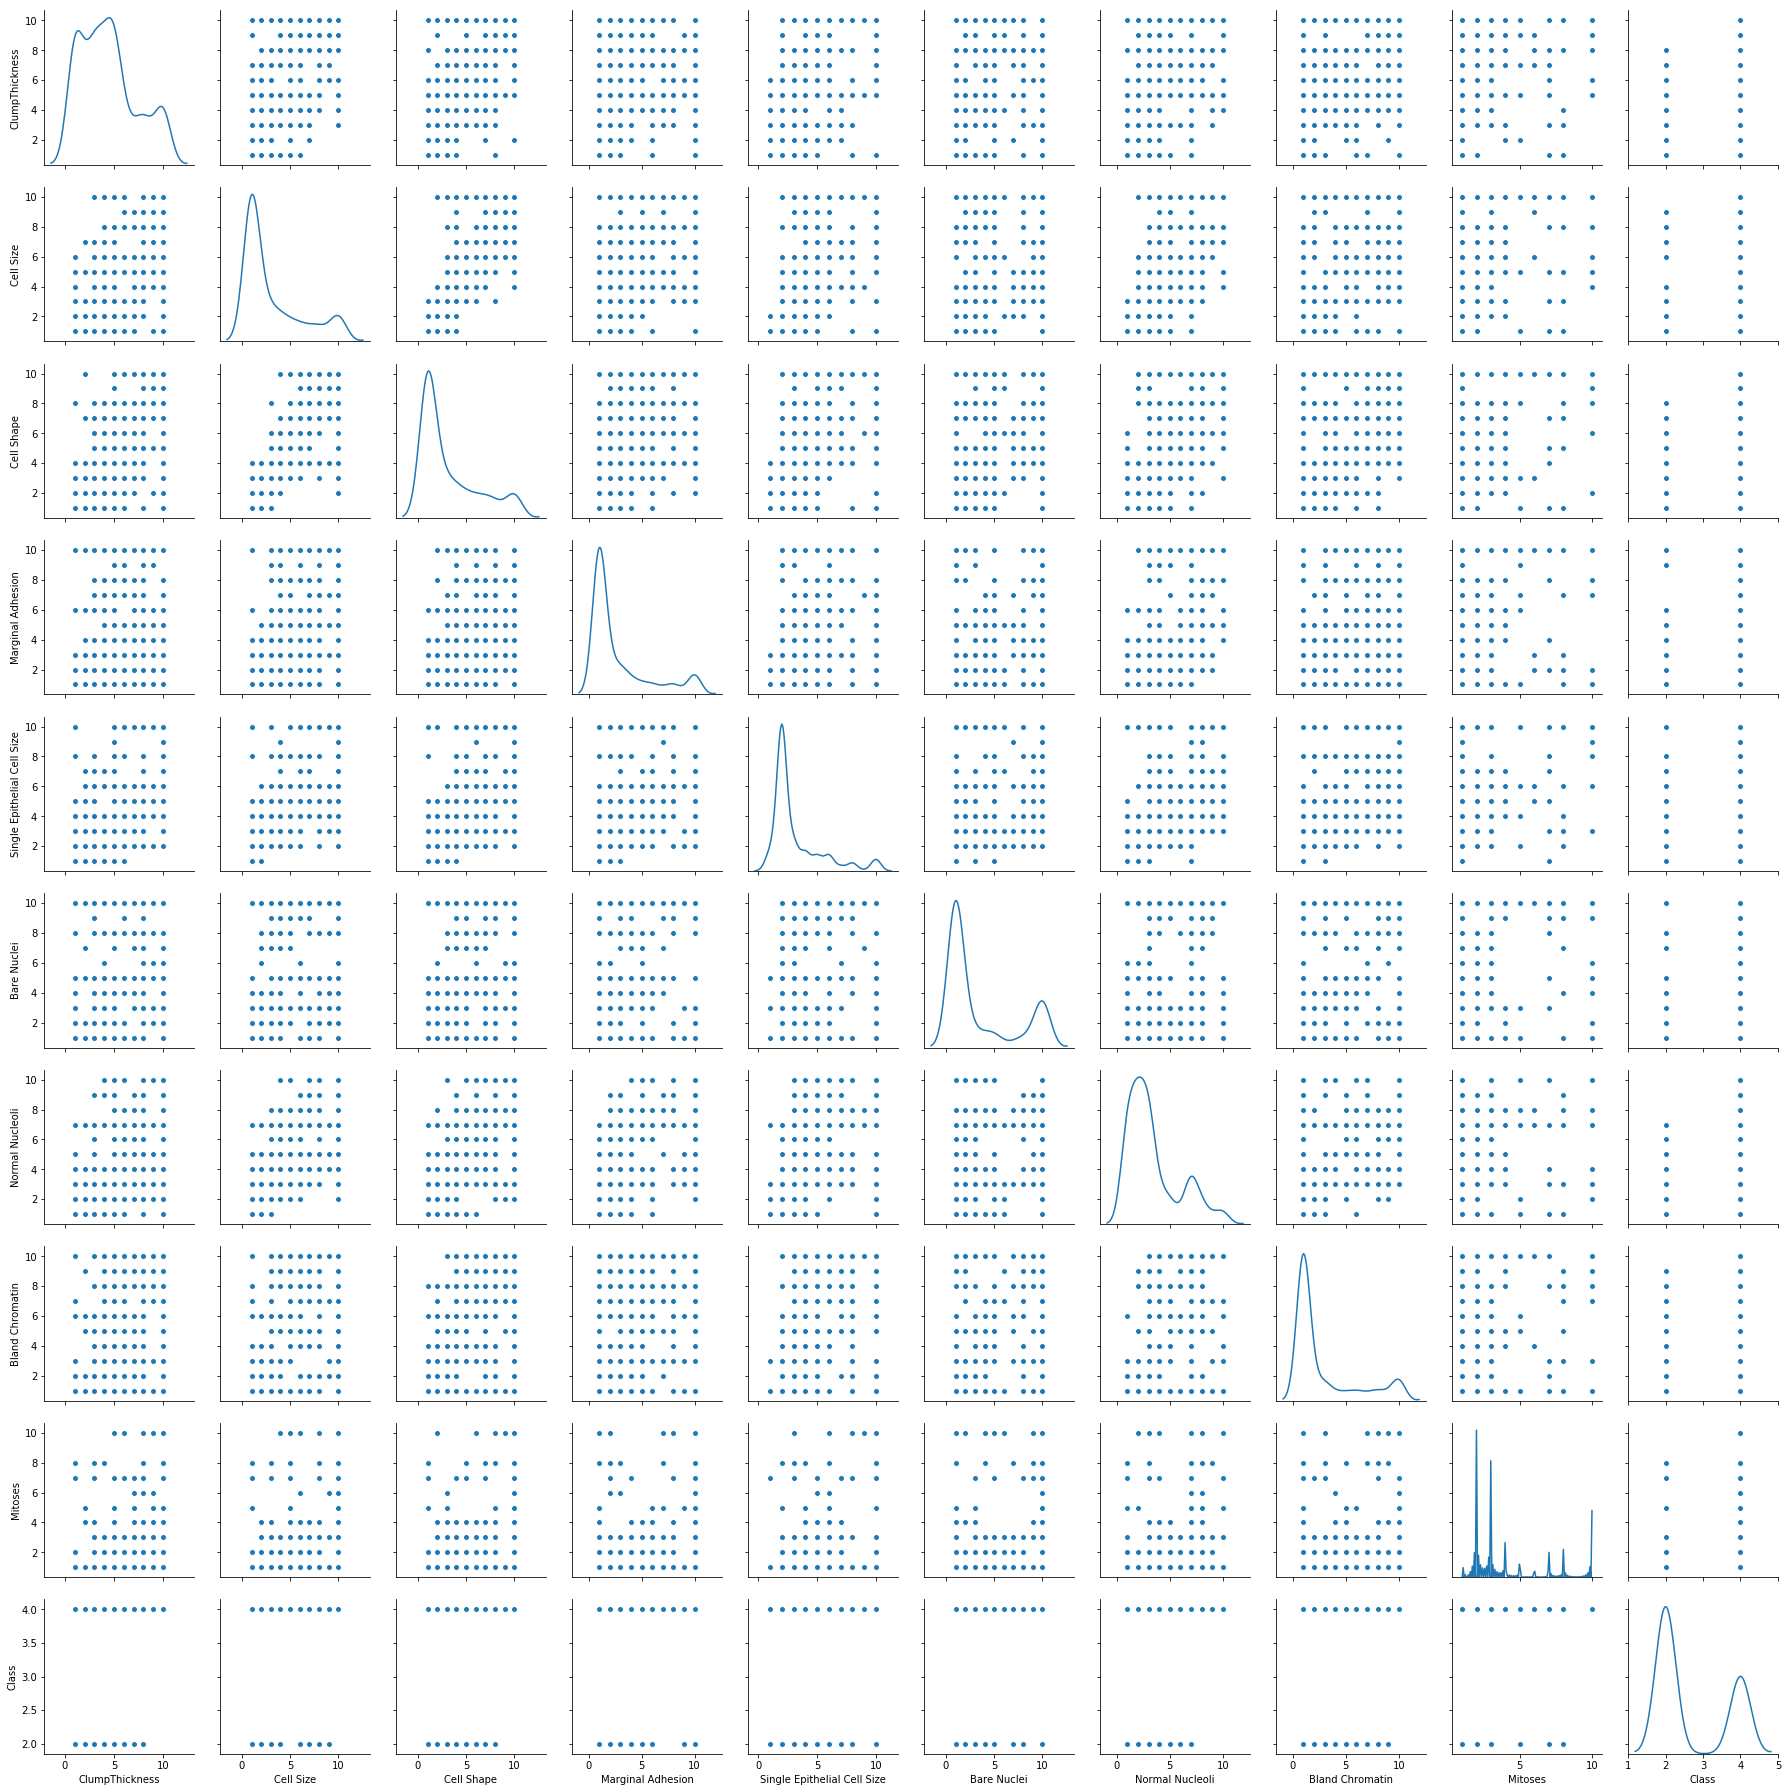

In [25]:
sns.pairplot(df_cancer,diag_kind='kde')

In [26]:
df_cancer.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [27]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [28]:
#Let us check for pair plots

In [29]:
# Relationship between variables shows some correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

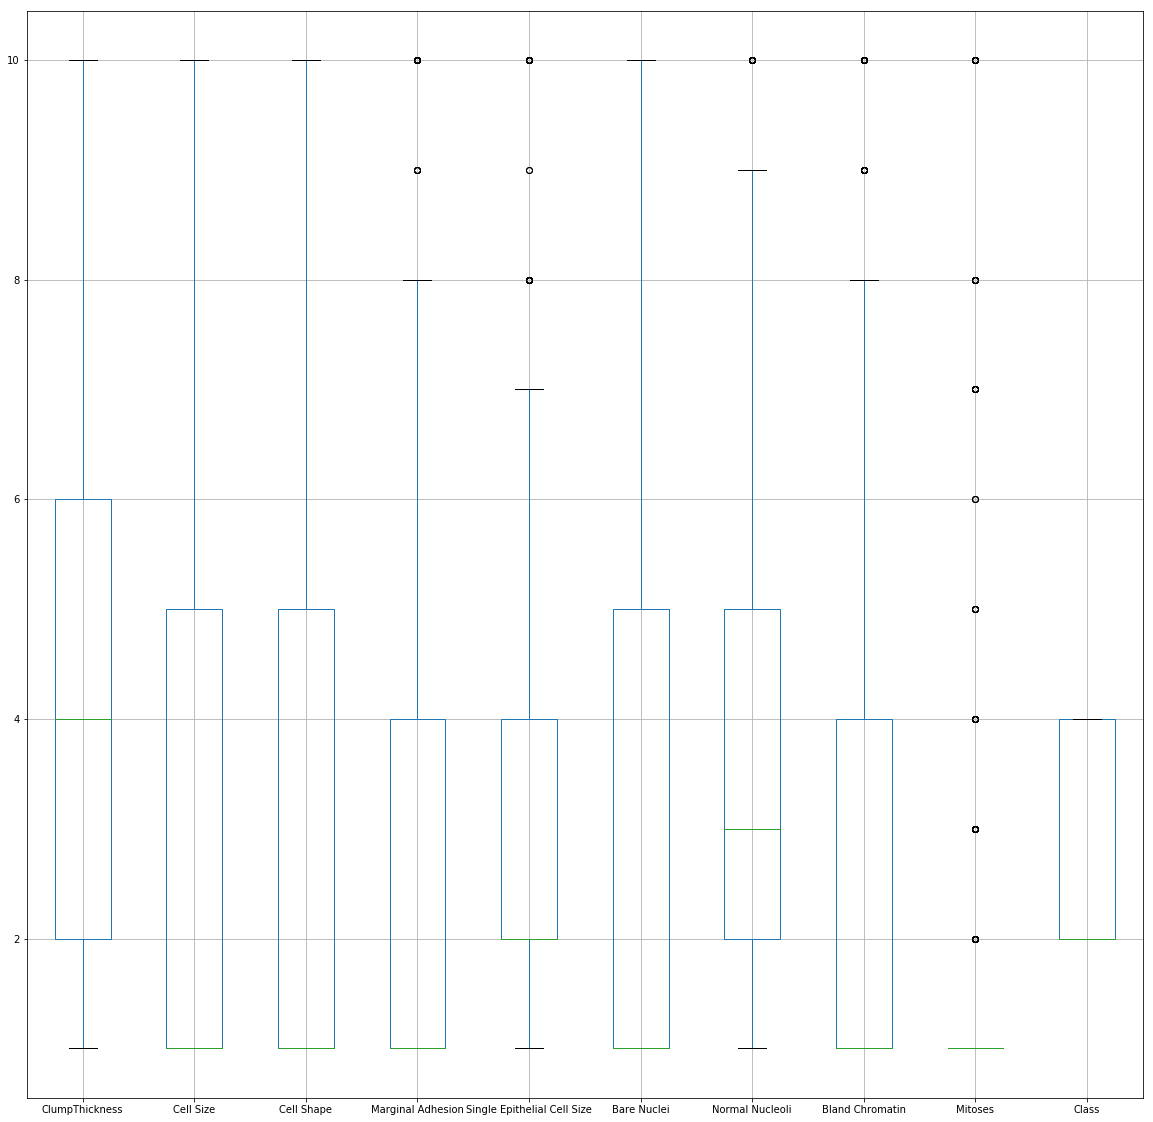

In [30]:
df_cancer.boxplot(figsize=[20,20])

In [31]:
# We could see most of the outliers are now removed.

In [32]:
# function to replace upper outlier with their max value of (Q3 + 1.5 * IRQ)
def treat_upper_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df[colname] = df[colname].apply(lambda x: ub if x > ub else x)

In [33]:
df_cancer.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [34]:
for i in df_cancer.columns:
    treat_upper_outliers(df_cancer,i)

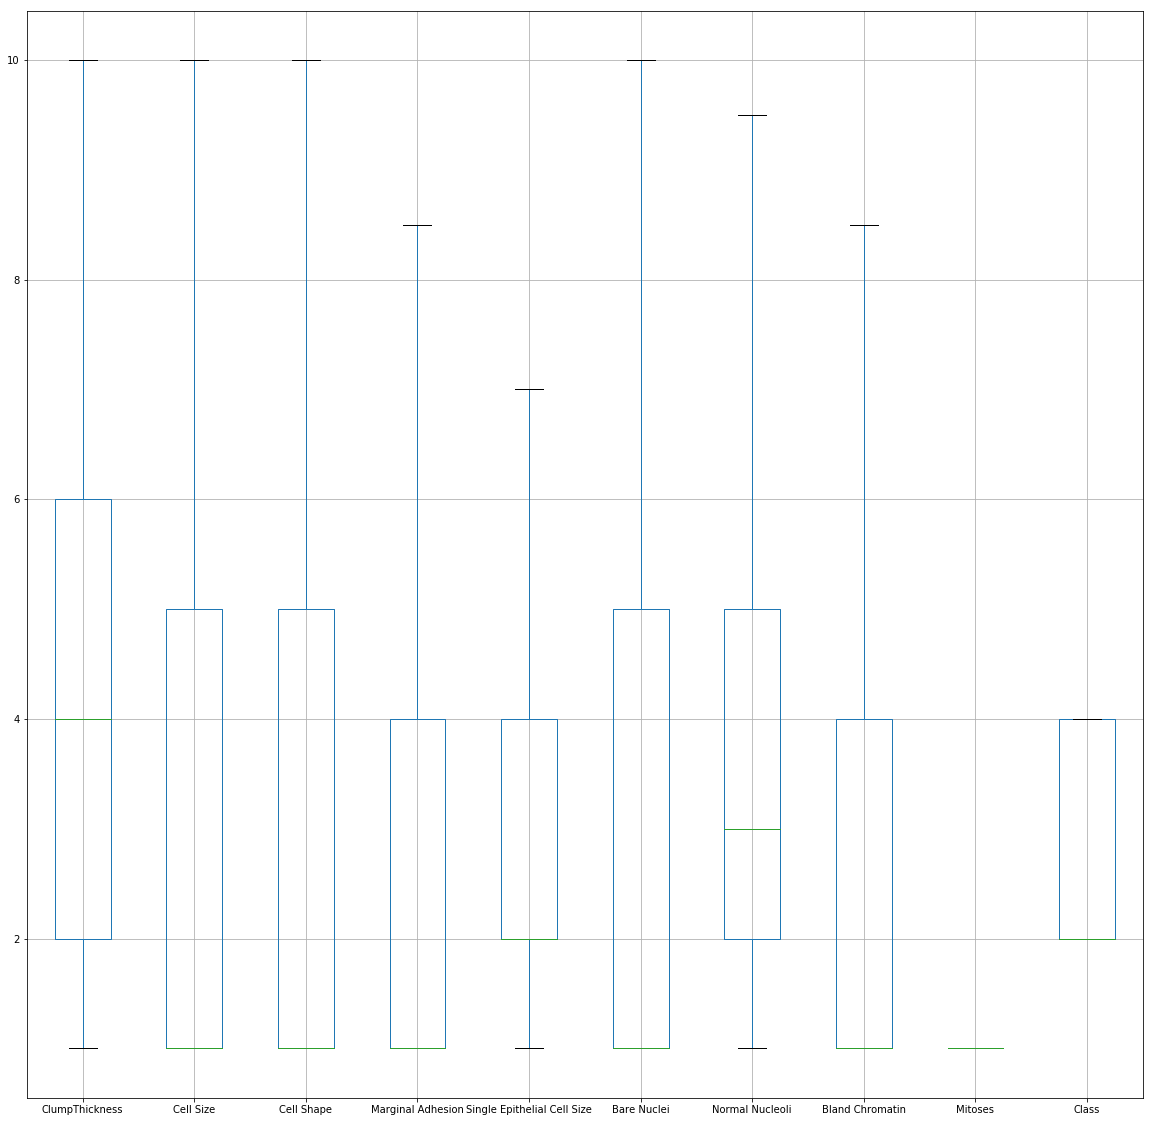

In [35]:
df_cancer.boxplot(figsize=[20,20])

In [36]:
df_cancer.drop(axis=1,columns='Mitoses',inplace=True)

In [37]:
df_cancer.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Class'],
      dtype='object')

In [40]:

# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()

# Q6 Create a covariance matrix for identifying Principal components

In [43]:
# PCA
# Step 1 - Create covariance matrix

In [44]:
X_cancer_std =  sc.fit_transform(df_cancer)  

In [45]:
cancer_cov_matrix = np.cov(X_cancer_std.T)
print('Covariance Matrix \n%s', cancer_cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.50022749 0.55064449 0.5908535
  0.56225094 0.54666716 0.71702715]
 [0.64583645 1.00143266 0.90818117 0.72048077 0.78565647 0.68765657
  0.75711145 0.72733735 0.81907552]
 [0.65552689 0.90818117 1.00143266 0.69580609 0.75601336 0.70848734
  0.73744448 0.72318567 0.820107  ]
 [0.50022749 0.72048077 0.69580609 1.00143266 0.65744977 0.68022757
  0.68186453 0.62651495 0.71400466]
 [0.55064449 0.78565647 0.75601336 0.65744977 1.00143266 0.62943312
  0.65715182 0.68576765 0.72971334]
 [0.5908535  0.68765657 0.70848734 0.68022757 0.62943312 1.00143266
  0.6794109  0.5924866  0.82014124]
 [0.56225094 0.75711145 0.73744448 0.68186453 0.65715182 0.6794109
  1.00143266 0.67343479 0.76127639]
 [0.54666716 0.72733735 0.72318567 0.62651495 0.68576765 0.5924866
  0.67343479 1.00143266 0.7242444 ]
 [0.71702715 0.81907552 0.820107   0.71400466 0.72971334 0.82014124
  0.76127639 0.7242444  1.00143266]]


# Q7 Identify eigen values and eigen vector

In [46]:
# Step 2- Get eigen values and eigen vector

In [47]:
eigenvalues, eigenvectors = np.linalg.eig(cancer_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.90919559e-01 -8.29902887e-01 -1.61483264e-02 -1.67512736e-01
   1.66638398e-01  1.91940100e-01 -3.62800642e-01  4.55186118e-02
  -3.40704216e-04]
 [ 3.59881872e-01  8.29205978e-02 -7.41559470e-01 -5.55755400e-03
   2.15701440e-01 -3.61742797e-01  7.77108222e-02  2.81619144e-01
  -2.25686958e-01]
 [ 3.57489525e-01  1.53792915e-02  6.46587099e-01 -1.89618398e-01
   1.90009199e-01 -5.18463885e-01  1.51796655e-01  2.26202110e-01
  -1.97019768e-01]
 [ 3.18847394e-01  3.49164437e-01  5.26370936e-02  1.43913396e-02
  -4.18453027e-01 -2.41951477e-02 -7.56837075e-01  3.06021055e-04
  -1.57961919e-01]
 [ 3.28424288e-01  2.43668709e-01  7.71399521e-02 -2.80192491e-02
   3.28653607e-01  6.11040652e-01  1.62876270e-01 -2.17642023e-01
  -5.20333350e-01]
 [ 3.24702492e-01 -1.36970053e-01 -1.13489633e-01 -4.00014771e-01
  -6.16575182e-01 -5.17089726e-02  4.03109160e-01 -3.96766431e-01
  -1.25065571e-02]
 [ 3.31308113e-01  1.51755218e-01  4.74481127e-02 -7.87177504e-02
  -1.50952

# Q8 Find variance and cumulative variance by each eigen vector

In [48]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
cancer_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
cancer_eig_pairs.sort()

cancer_eig_pairs.reverse()
print(cancer_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
cancer_eigvalues_sorted = [cancer_eig_pairs[index][0] for index in range(len(eigenvalues))]
cancer_eigvectors_sorted = [cancer_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %cancer_eigvalues_sorted)

[(6.568671241217466, array([0.29091956, 0.35988187, 0.35748952, 0.31884739, 0.32842429,
       0.32470249, 0.33130811, 0.32005636, 0.36179147])), (0.5497539469997489, array([-0.82990289,  0.0829206 ,  0.01537929,  0.34916444,  0.24366871,
       -0.13697005,  0.15175522,  0.22506088, -0.17440116])), (0.4668366603892975, array([ 0.1666384 ,  0.21570144,  0.1900092 , -0.41845303,  0.32865361,
       -0.61657518, -0.15095238,  0.4253012 , -0.15050655])), (0.3440717725472553, array([-3.40704216e-04, -2.25686958e-01, -1.97019768e-01, -1.57961919e-01,
       -5.20333350e-01, -1.25065571e-02,  4.75505571e-01,  6.20428953e-01,
        5.79282419e-02])), (0.3094242451835118, array([ 4.55186118e-02,  2.81619144e-01,  2.26202110e-01,  3.06021055e-04,
       -2.17642023e-01, -3.96766431e-01,  6.35462181e-01, -4.90594869e-01,
       -1.34774127e-01])), (0.3070279491133447, array([-0.36280064,  0.07771082,  0.15179666, -0.75683708,  0.16287627,
        0.40310916,  0.18257927, -0.12723319,  0.167161

In [50]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(cancer_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance.  
# cumulative reaching almost 100%

In [51]:
print(cum_var_exp)

[0.72880822 0.78980461 0.84160114 0.87977664 0.91410793 0.94817334
 0.97588928 0.99019851 1.        ]


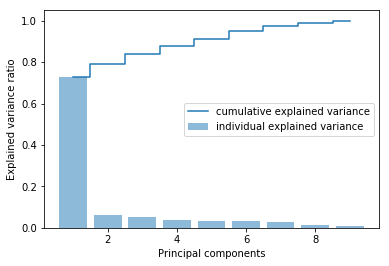

In [52]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')

plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [53]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(cancer_eigvectors_sorted[0:5])   # Reducing from 9 to 5 dimension space

X_std_5D = np.dot(X_cancer_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_5D)  # converting array to dataframe for pairplot

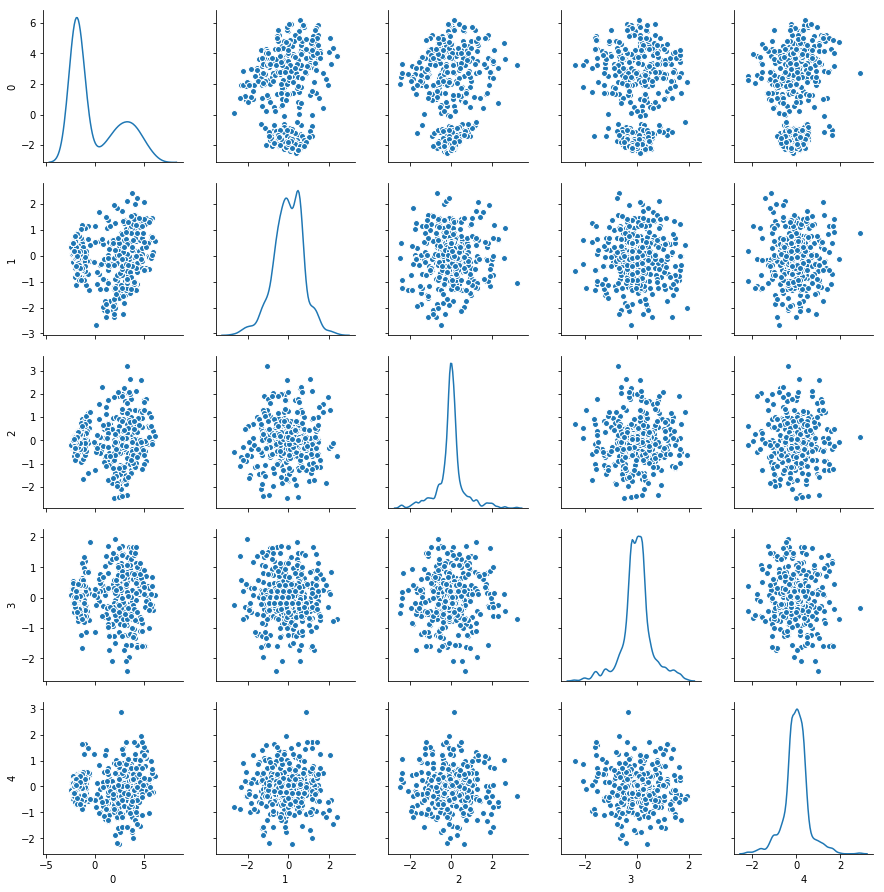

In [54]:
#Let us check it visually

sns.pairplot(Proj_data_df, diag_kind='kde') 

# Q10 Find correlation between components and features

In [55]:
df_corr = pd.DataFrame(cancer_eigvectors_sorted[0:5],columns=df_cancer.columns)

In [56]:
df_corr.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Class
0,0.290920,0.359882,0.357490,0.318847,0.328424,0.324702,0.331308,0.320056,0.361791
1,-0.829903,0.082921,0.015379,0.349164,0.243669,-0.136970,0.151755,0.225061,-0.174401
2,0.166638,0.215701,0.190009,-0.418453,0.328654,-0.616575,-0.150952,0.425301,-0.150507
3,-0.000341,-0.225687,-0.197020,-0.157962,-0.520333,-0.012507,0.475506,0.620429,0.057928
4,0.045519,0.281619,0.226202,0.000306,-0.217642,-0.396766,0.635462,-0.490595,-0.134774


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [57]:
df_jokes = pd.read_csv("jokes.csv")

In [58]:
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [59]:
df_jokes.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [60]:
ratings = df_jokes.iloc[0:200,1:]

In [61]:
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [62]:
ratings.columns = range(0,100)

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [63]:
ratings.replace(99.00,0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [64]:
sc1 = StandardScaler()
ratings_diff = sc1.fit_transform(ratings)

In [65]:
ratings_diff

array([[-0.83401707, -0.26302556, -0.9426833 , ...,  0.70778183,
         0.7894014 ,  0.70807651],
       [-0.5697436 , -0.49904647, -0.60368031, ..., -1.40370926,
        -1.3580697 , -1.41633091],
       [ 1.5382259 ,  2.08184746,  1.35669652, ...,  0.70778183,
         0.7894014 ,  0.70807651],
       ...,
       [-0.60216707, -0.5900237 , -0.76302442, ..., -1.42660908,
        -1.25310717, -1.42999758],
       [ 1.5382259 ,  2.08184746,  1.35669652, ...,  0.70778183,
         0.7894014 ,  0.70807651],
       [-0.53643182, -0.68074099, -0.834761  , ...,  0.70778183,
         0.7894014 ,  0.70807651]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [66]:
ratings_diff.shape

(200, 100)

In [67]:
ratings_diff.dtype

dtype('float64')

In [68]:
ratings_diff_mean = pd.DataFrame(ratings_diff).mean(axis=0)

In [69]:
ratings_diff_mean.shape

(100,)

In [70]:
ratings_diff_mean.dtype

dtype('float64')

In [71]:
#Top 10 jokes 
ratings_diff_mean.sort_values(ascending=False).head(10).index

Int64Index([87, 84, 3, 95, 72, 70, 93, 83, 96, 63], dtype='int64')